<a href="https://colab.research.google.com/github/SMITamim/OnlineBankingUsersatiSfaction/blob/main/Thesis_Niloy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics


In [ ]:
data = pd.read_csv("User satisfaction and challenges of mobile banking services in Bangladesh (1).csv",encoding='cp1252')

In [ ]:
data.shape

(111, 17)

In [ ]:
data.head()

,Timestamp,1. Please select your gender,2. Age,3. Are you using mobile banking services?,4. Which mobile banking services are you using?,5. How often do you use mobile banking services?,6. Why are you using this mobile banking services?,7. Are you using mobile banking applications?,8. How easy or difficult is it to navigate the mobile banking application you use?,9. Have you ever faced any issues with the mobile banking transaction process?,"10. If yes, what was the issue?",11. Have you ever faced any security issues while using mobile banking services?,12. How satisfied are you with the security measures in place for mobile banking?,13. How satisfied are you with the customer support provided by your mobile banking service provider?,14. Have you ever experienced fraud or unauthorized access to your mobile banking account?,"15. If yes, how was the issue resolved?",16. What improvements would you suggest to enhance your mobile banking experience?
0,2023/05/22 9:40:57 PM GMT+6,Male,18-25,Yes,Bkash,Weekly,Money Transaction,Yes,Easy,Yes,Technical Issue,Yes,Satisfied,Satisfied,Maybe,Fastly,Enhanced Security Features
1,2023/05/22 9:41:46 PM GMT+6,Male,18-25,Yes,Bkash;Nagad;Rocket,Daily,Money Transaction;Easy To Use,Yes,Easy,Yes,Technical Issue;Security Issue,Yes,Very satisfied,Satisfied,Yes,Fastly,Improved At Features
2,2023/05/22 9:43:20 PM GMT+6,Male,18-25,Yes,Bkash,Weekly,Money Transaction;Easy To Use,Yes,Easy,Yes,Service Unavailable,No,Satisfied,Satisfied,No,Fastly,Improved At Features
3,2023/05/22 9:44:39 PM GMT+6,Male,18-25,Yes,Nagad,Daily,Money Transaction,Yes,Easy,Yes,Security Issue,No,Satisfied,Satisfied,No,Not Resolved Yet,Improved At Features;Improve Customers Services;
4,2023/05/22 9:45:04 PM GMT+6,Male,18-25,Yes,Bkash,Daily,Easy To Use,Yes,Easy,Yes,Technical Issue;Security Issue,Yes,Satisfied,Neutral,No,Fastly,Faster Transaction Processing


In [ ]:
data.describe()

,Timestamp,1. Please select your gender,2. Age,3. Are you using mobile banking services?,4. Which mobile banking services are you using?,5. How often do you use mobile banking services?,6. Why are you using this mobile banking services?,7. Are you using mobile banking applications?,8. How easy or difficult is it to navigate the mobile banking application you use?,9. Have you ever faced any issues with the mobile banking transaction process?,"10. If yes, what was the issue?",11. Have you ever faced any security issues while using mobile banking services?,12. How satisfied are you with the security measures in place for mobile banking?,13. How satisfied are you with the customer support provided by your mobile banking service provider?,14. Have you ever experienced fraud or unauthorized access to your mobile banking account?,"15. If yes, how was the issue resolved?",16. What improvements would you suggest to enhance your mobile banking experience?
count,111,111,111,111,111,111,111,111,111,111,106,111,111,111,111,68,111
unique,110,2,3,2,10,3,11,2,4,2,14,2,3,5,3,3,17
top,2023/05/22 11:02:24 PM GMT+6,Male,18-25,Yes,Bkash,Weekly,Money Transaction;Easy To Use,Yes,Easy,Yes,None,No,Satisfied,Satisfied,No,Fastly,Improved At Features
freq,2,86,94,107,49,56,39,104,52,71,34,67,64,63,66,36,29


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 17 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Timestamp                                                                                              111 non-null    object
 1   1. Please select your gender                                                                           111 non-null    object
 2   2. Age                                                                                                 111 non-null    object
 3   3. Are you using mobile banking  services?                                                             111 non-null    object
 4   4. Which mobile banking services are you using?                                                        1

In [ ]:
print(data.isnull().sum())

Timestamp                                                                                                 0
1. Please select your gender                                                                              0
2. Age                                                                                                    0
3. Are you using mobile banking  services?                                                                0
4. Which mobile banking services are you using?                                                           0
5. How often do you use mobile banking services?                                                          0
6. Why are you  using this mobile banking services?                                                       0
7. Are you using mobile banking applications?                                                             0
8. How easy or difficult is it to navigate the mobile banking application you use?                        0
9. Have you ever faced any i

In [ ]:
data = data.dropna()

In [ ]:
print(data.columns)


Index(['Timestamp', '1. Please select your gender', '2. Age',
       '3. Are you using mobile banking  services?',
       '4. Which mobile banking services are you using?',
       '5. How often do you use mobile banking services?',
       '6. Why are you  using this mobile banking services?',
       '7. Are you using mobile banking applications?',
       '8. How easy or difficult is it to navigate the mobile banking application you use?',
       '9. Have you ever faced any issues with the mobile banking transaction process?',
       '10. If yes, what was the issue? ',
       '11. Have you ever faced any security issues while using mobile banking services?',
       '12.  How satisfied are you with the security measures in place for mobile banking?',
       '13. How satisfied are you with the customer support provided by your mobile banking service provider?',
       '14.  Have you ever experienced fraud or unauthorized access to your mobile banking account?',
       '15. If yes, how was

In [ ]:
#transform categorical variable
data['1. Please select your gender'] = data['1. Please select your gender'].astype('category')
data['3. Are you using mobile banking  services?'] = data['3. Are you using mobile banking  services?'].astype('category')
data['4. Which mobile banking services are you using?'] = data['4. Which mobile banking services are you using?'].astype('category')
data['5. How often do you use mobile banking services?'] = data['5. How often do you use mobile banking services?'].astype('category')
data['6. Why are you  using this mobile banking services?'] = data['6. Why are you  using this mobile banking services?'].astype('category')
data['7. Are you using mobile banking applications?'] = data['7. Are you using mobile banking applications?'].astype('category')
data['8. How easy or difficult is it to navigate the mobile banking application you use?'] = data['8. How easy or difficult is it to navigate the mobile banking application you use?'].astype('category')
data['9. Have you ever faced any issues with the mobile banking transaction process?'] = data['9. Have you ever faced any issues with the mobile banking transaction process?'].astype('category')
data['10. If yes, what was the issue? '] = data['10. If yes, what was the issue? '].astype('category')
data['11. Have you ever faced any security issues while using mobile banking services?'] = data['11. Have you ever faced any security issues while using mobile banking services?'].astype('category')
data['12.  How satisfied are you with the security measures in place for mobile banking?'] = data['12.  How satisfied are you with the security measures in place for mobile banking?'].astype('category')
data['13. How satisfied are you with the customer support provided by your mobile banking service provider?'] = data['13. How satisfied are you with the customer support provided by your mobile banking service provider?'].astype('category')
data['14.  Have you ever experienced fraud or unauthorized access to your mobile banking account?'] = data['14.  Have you ever experienced fraud or unauthorized access to your mobile banking account?'].astype('category')
data['15. If yes, how was the issue resolved?'] = data['15. If yes, how was the issue resolved?'].astype('category')
data['16.  What improvements would you suggest to enhance your mobile banking experience?'] = data['16.  What improvements would you suggest to enhance your mobile banking experience?'].astype('category')


df = pd.DataFrame(data)
print(data.dtypes)

Timestamp                                                                                                  object
1. Please select your gender                                                                             category
2. Age                                                                                                     object
3. Are you using mobile banking  services?                                                               category
4. Which mobile banking services are you using?                                                          category
5. How often do you use mobile banking services?                                                         category
6. Why are you  using this mobile banking services?                                                      category
7. Are you using mobile banking applications?                                                            category
8. How easy or difficult is it to navigate the mobile banking application you use?      

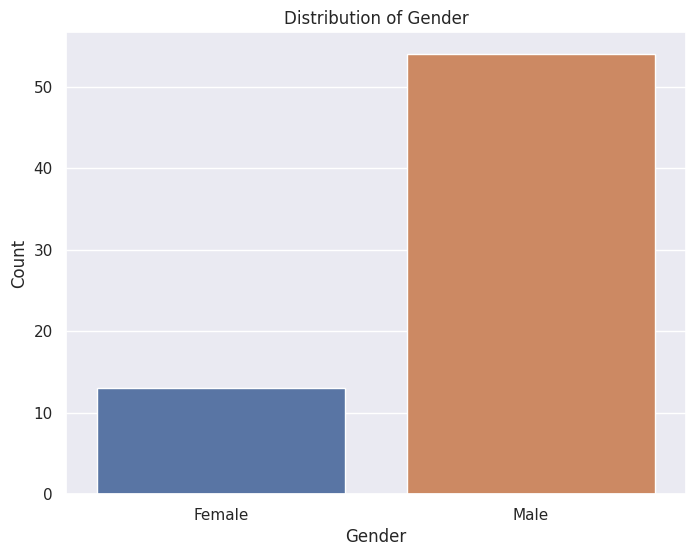

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'Please select your gender'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='1. Please select your gender', data=data)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


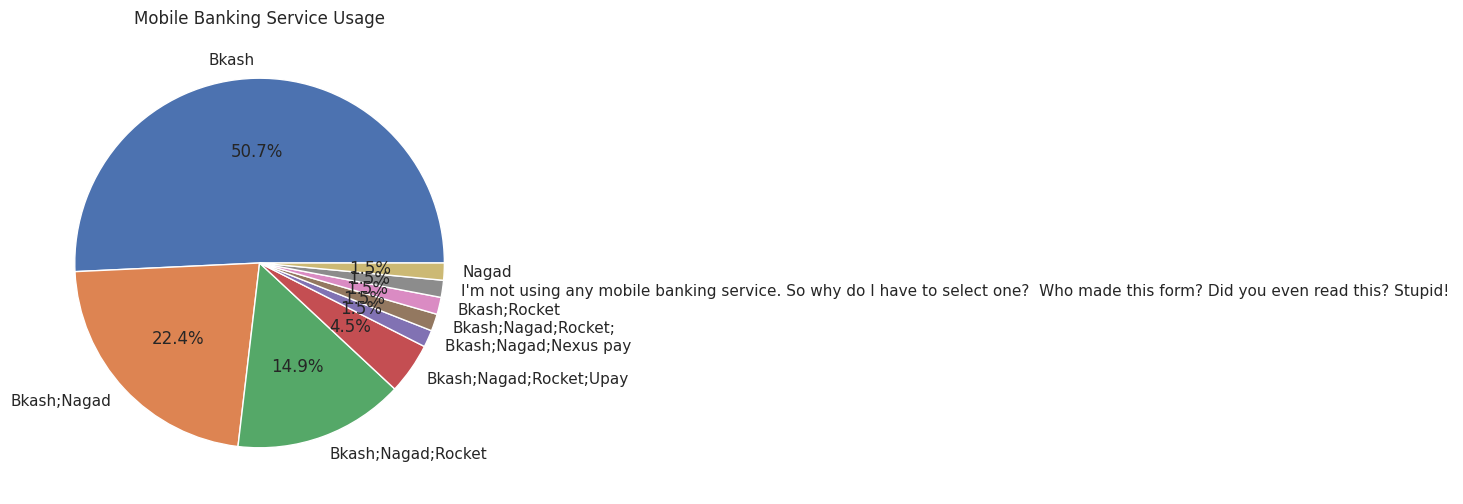

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for 'Which mobile banking services are you using?'
plt.figure(figsize=(8, 6))
data['4. Which mobile banking services are you using?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Mobile Banking Service Usage")
plt.ylabel("")
plt.show()


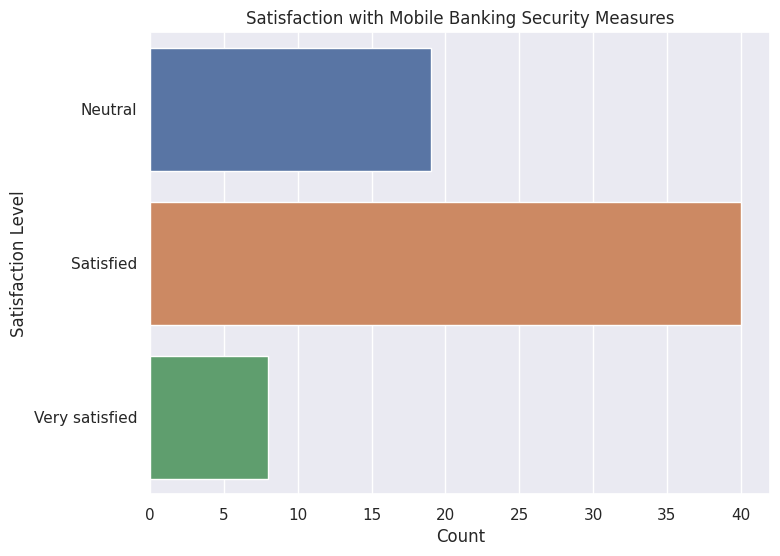

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Horizontal bar plot for 'How satisfied are you with the security measures in place for mobile banking?'
plt.figure(figsize=(8, 6))
sns.countplot(y='12.  How satisfied are you with the security measures in place for mobile banking?', data=data)
plt.title("Satisfaction with Mobile Banking Security Measures")
plt.xlabel("Count")
plt.ylabel("Satisfaction Level")
plt.show()


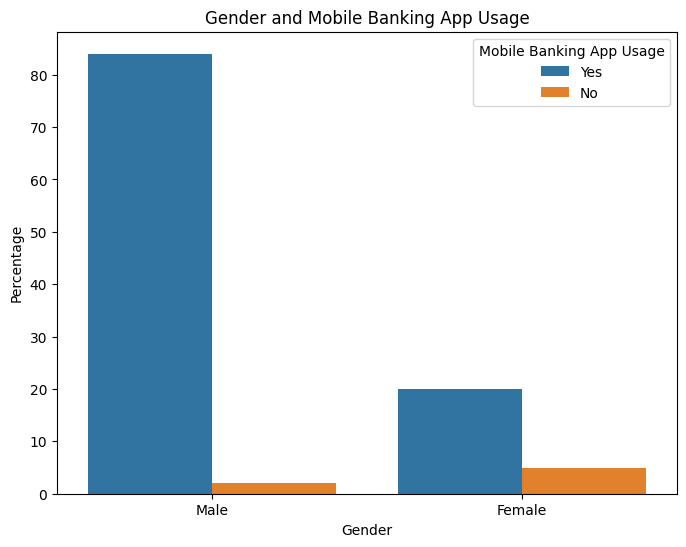

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked bar plot for 'Please select your gender' and 'Are you using mobile banking applications?'
plt.figure(figsize=(8, 6))
sns.countplot(x='1. Please select your gender', hue='7. Are you using mobile banking applications?', data=data)
plt.title("Gender and Mobile Banking App Usage")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title="Mobile Banking App Usage")
plt.show()


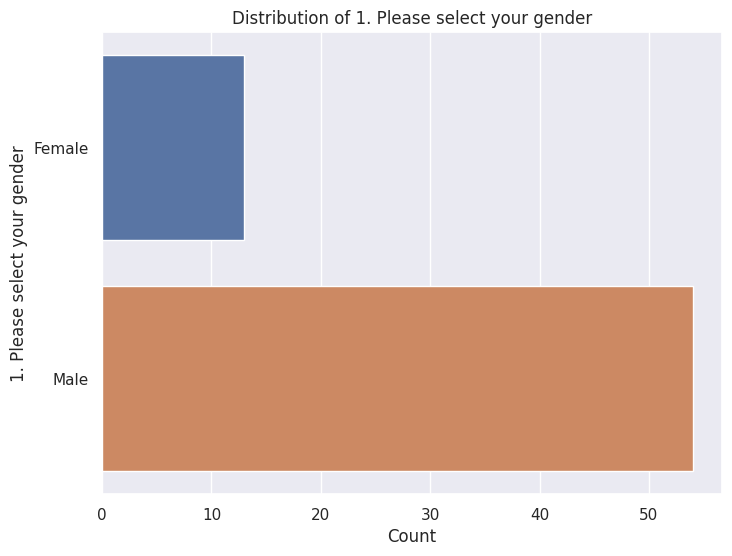

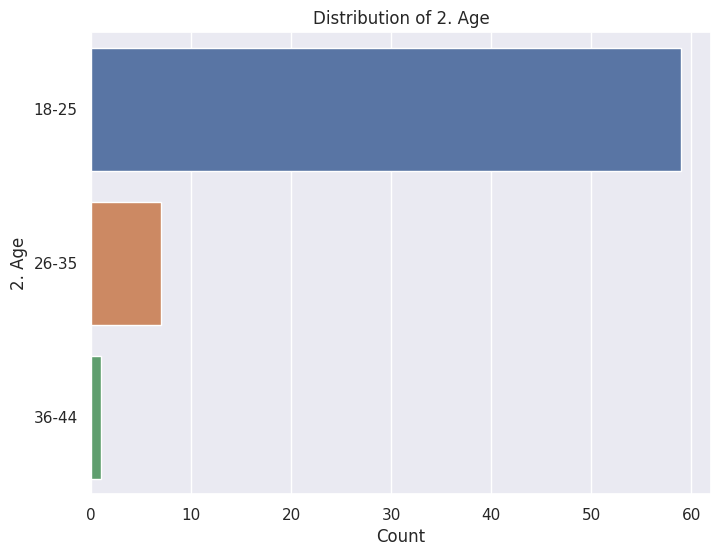

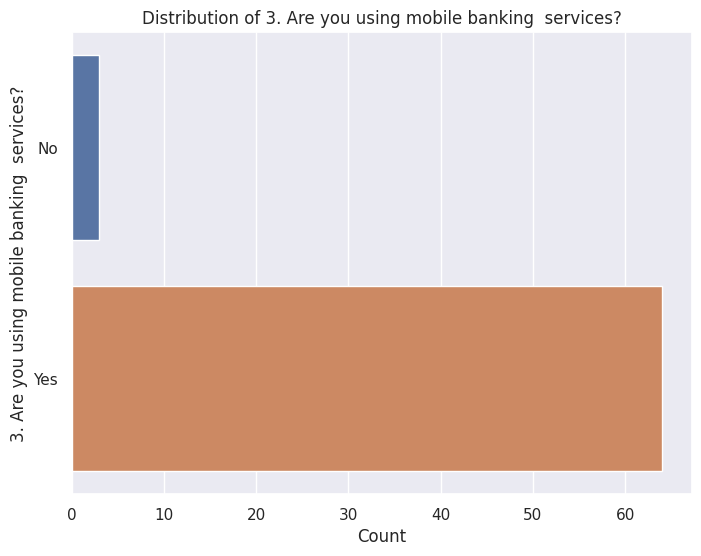

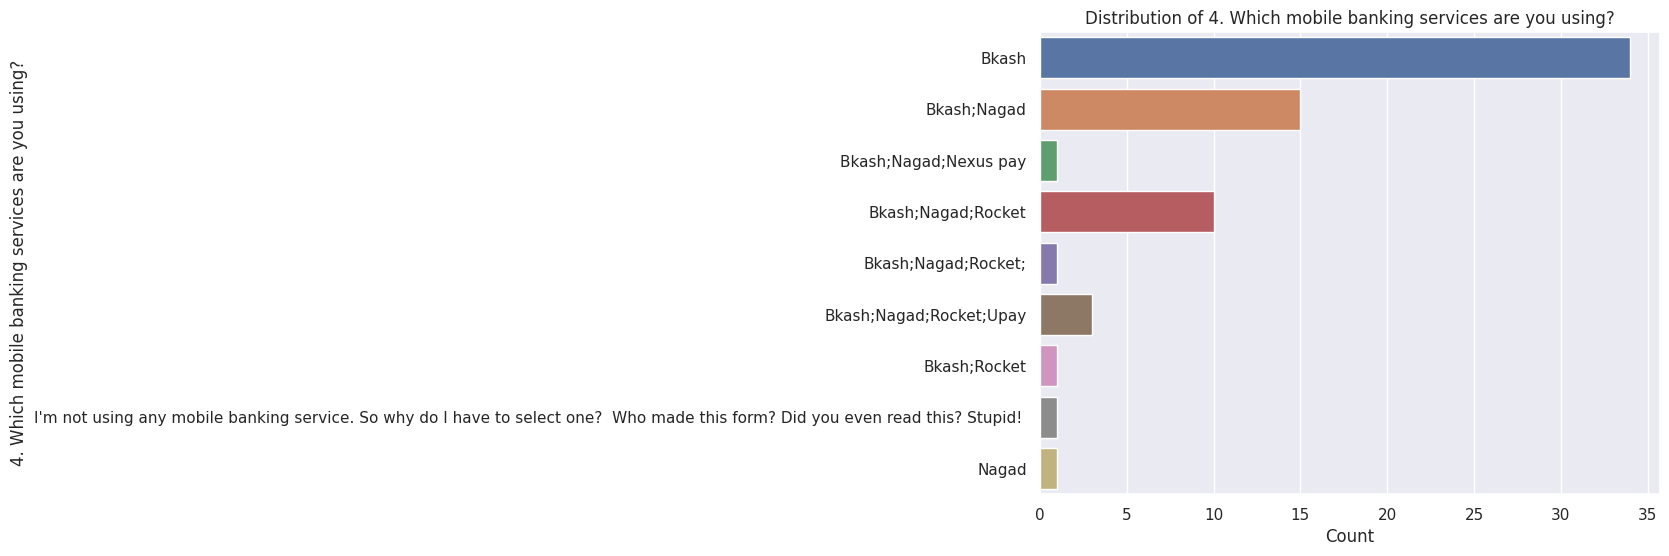

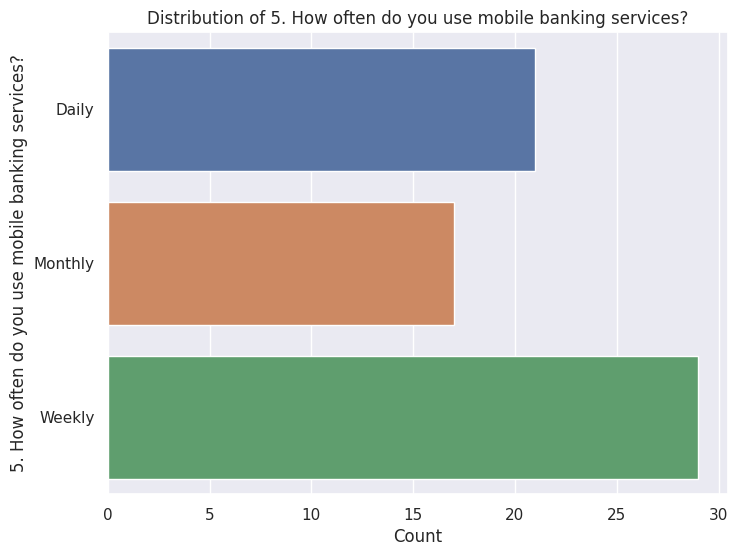

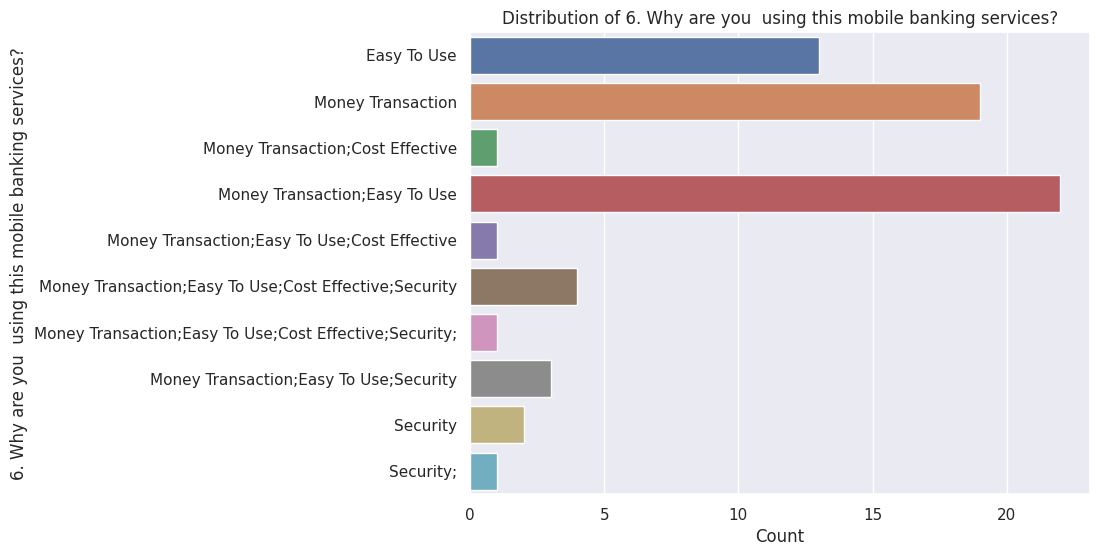

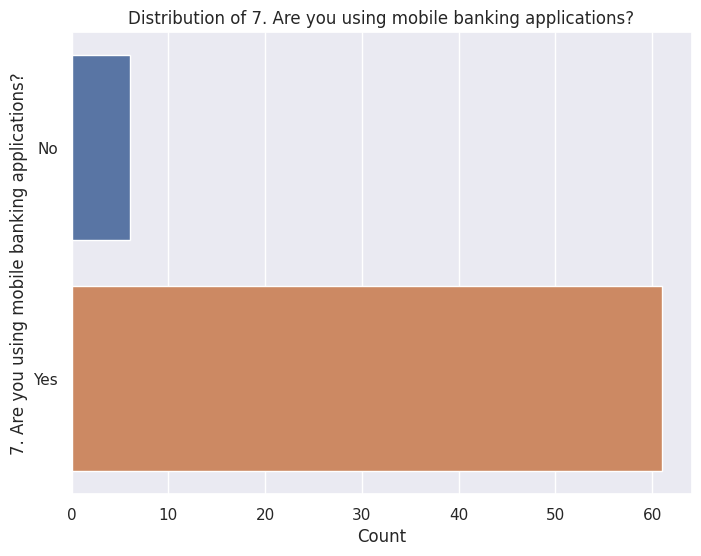

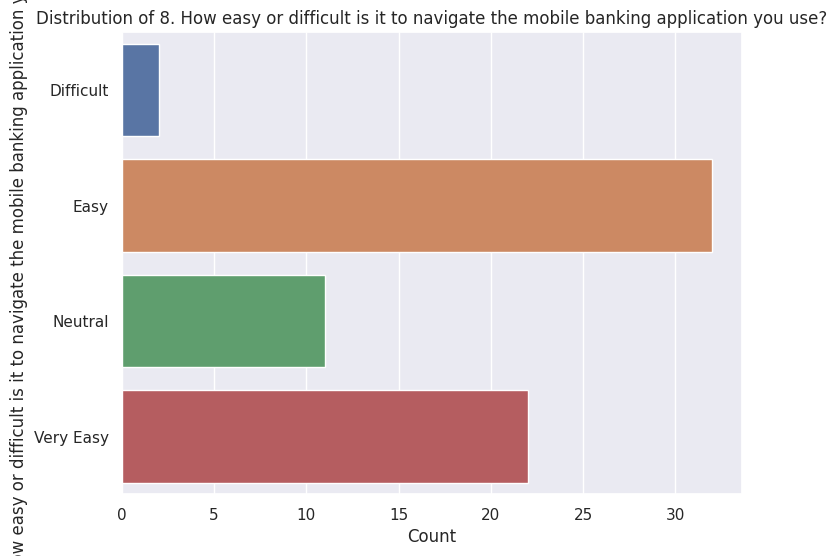

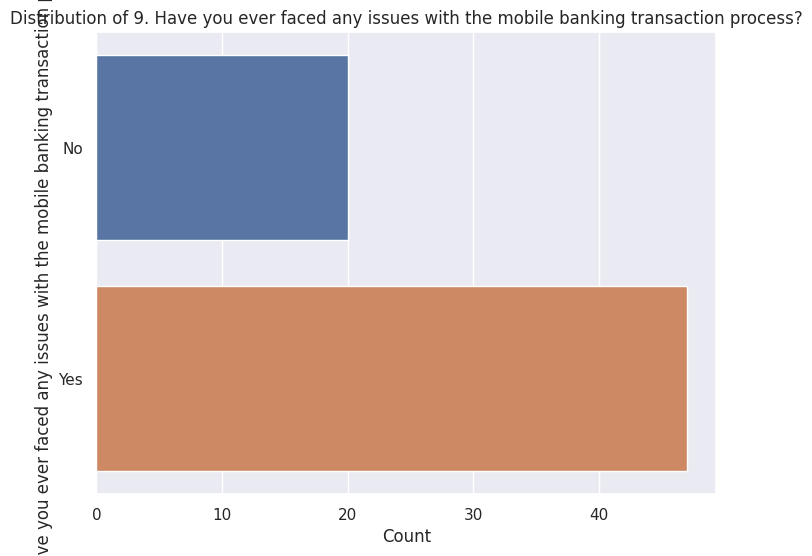

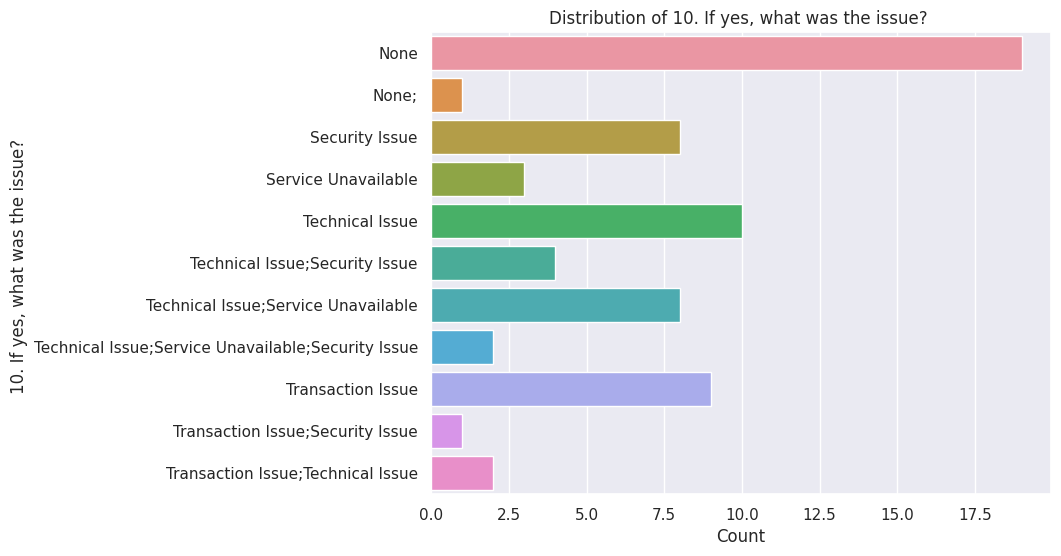

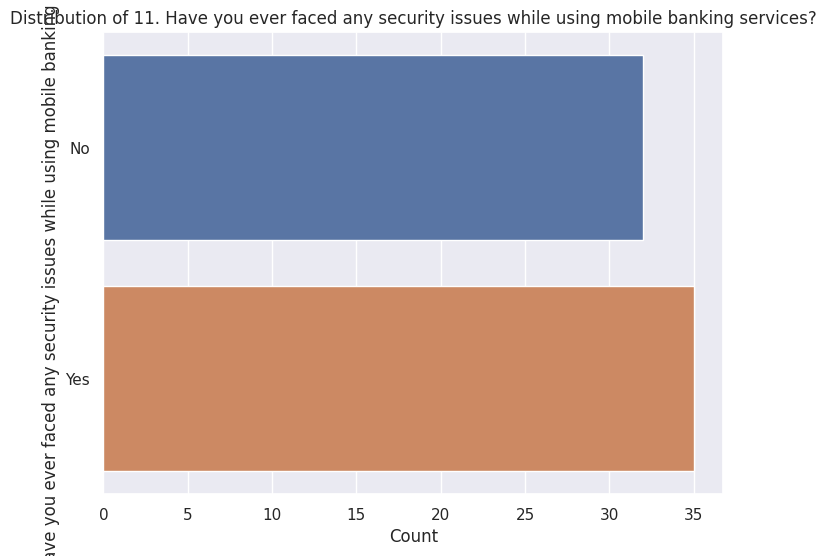

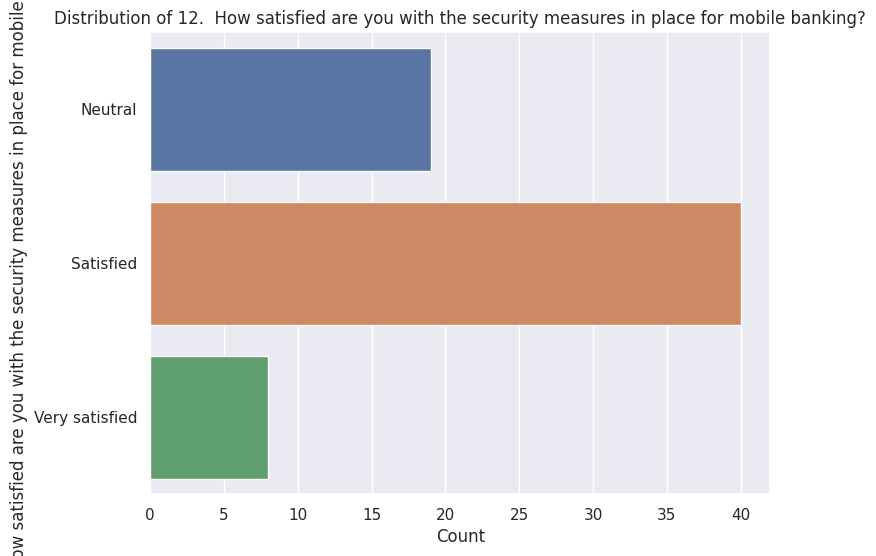

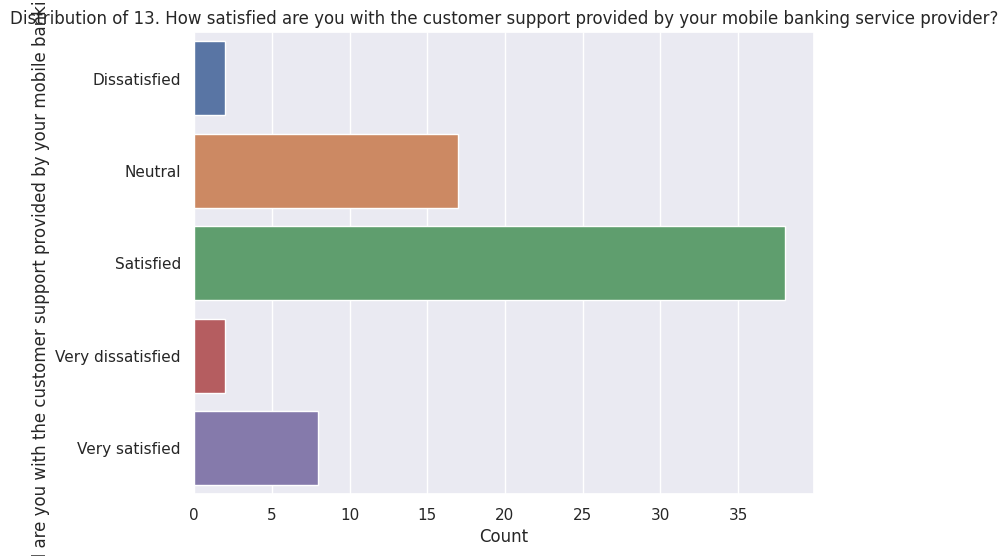

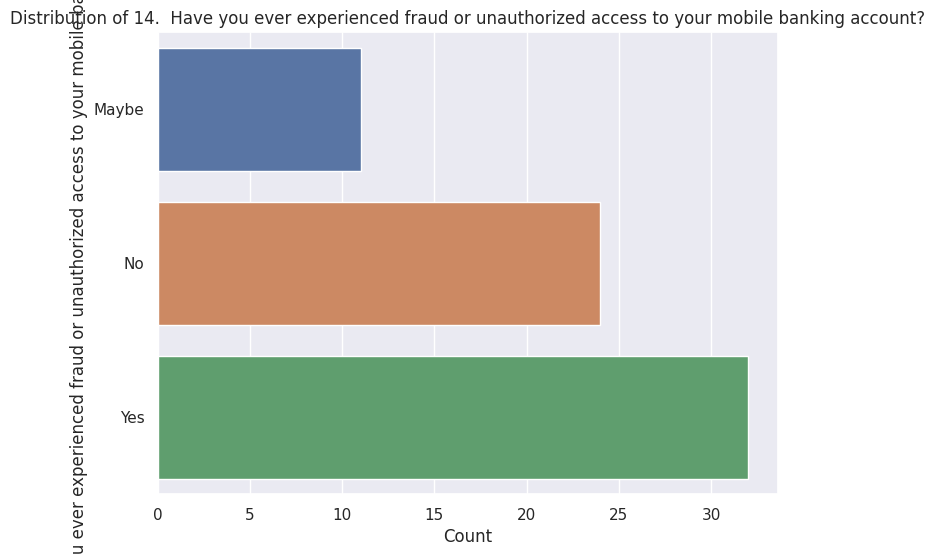

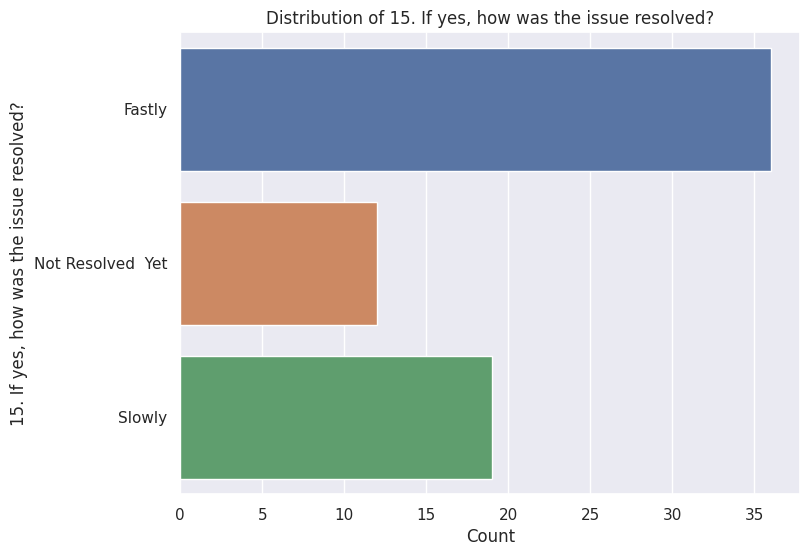

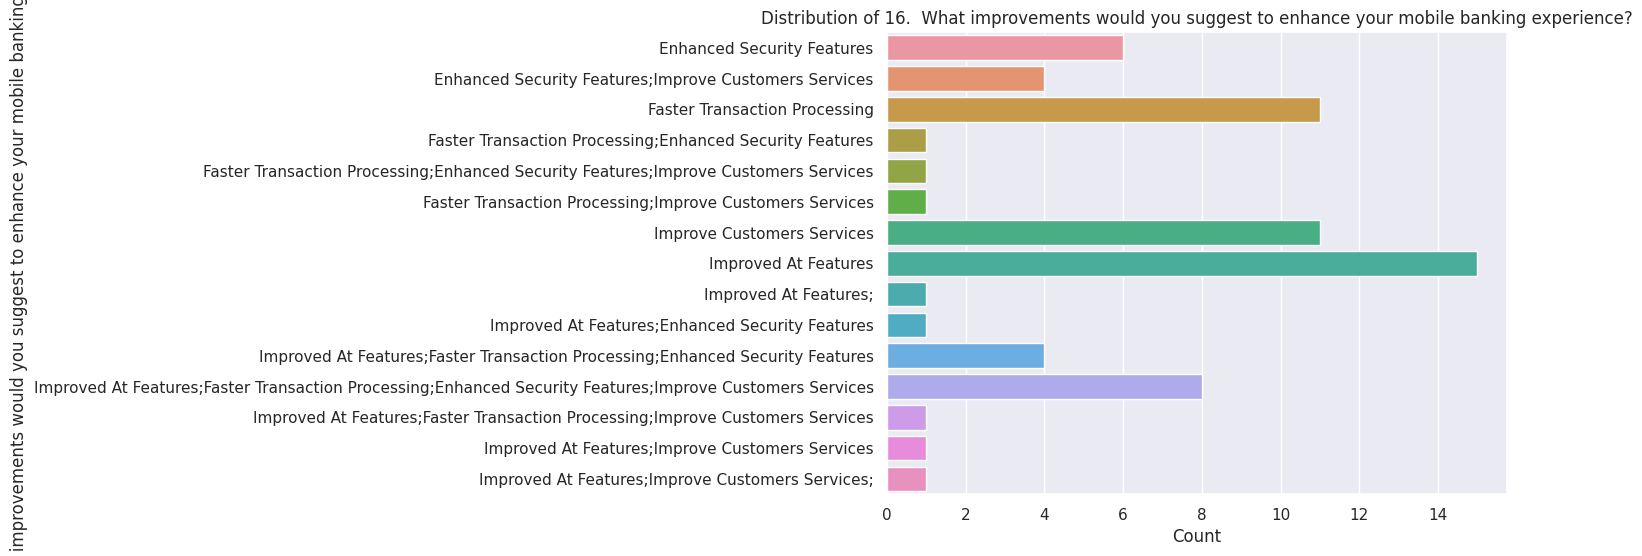

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column (excluding Timestamp)
for column in data.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()



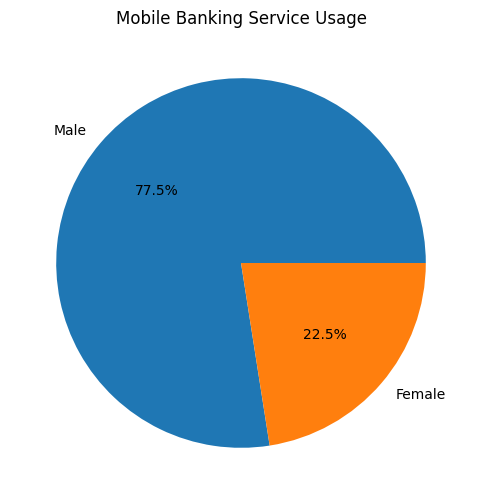

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for 'Which mobile banking services are you using?'
plt.figure(figsize=(8, 6))
data['1. Please select your gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Mobile Banking Service Usage")
plt.ylabel("")
plt.show()


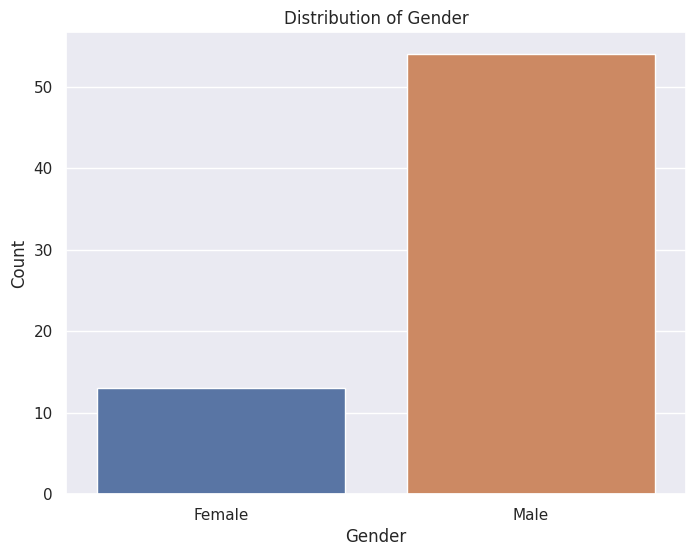

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'Please select your gender'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='', data=data)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


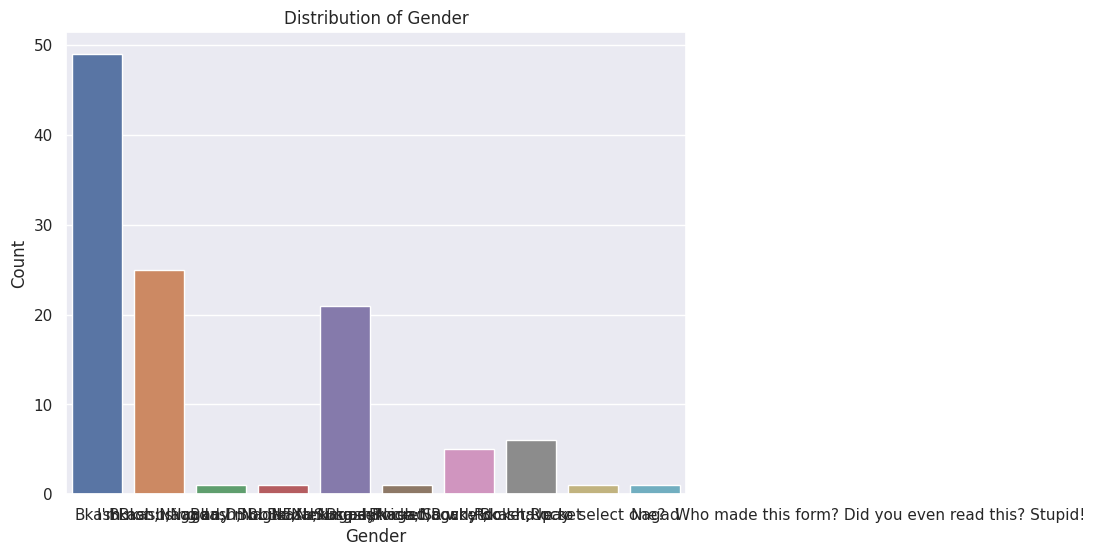

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'Please select your gender'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='4. Which mobile banking services are you using?', data=data)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



for column in data.columns[1:]:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(y=column, data=data)
    plt.title(f"Ques no of {column}")
    plt.xlabel("Percentage")
    plt.ylabel("")

    # Add percentage text on each bar
    total = len(data[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

NameError: ignored

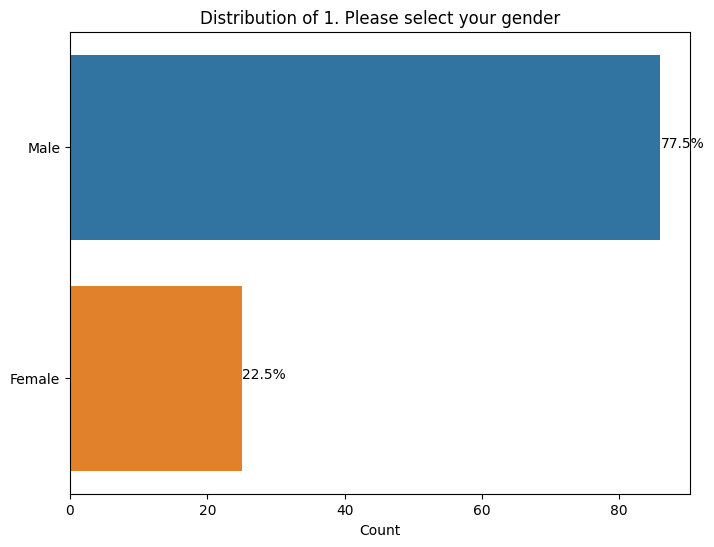

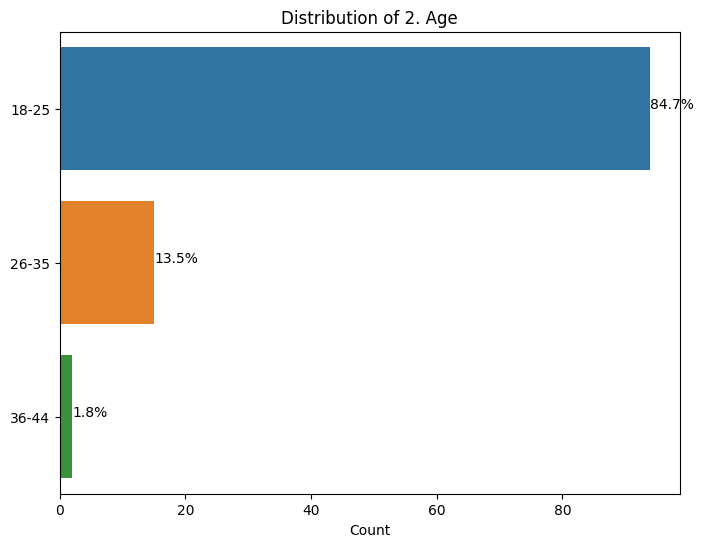

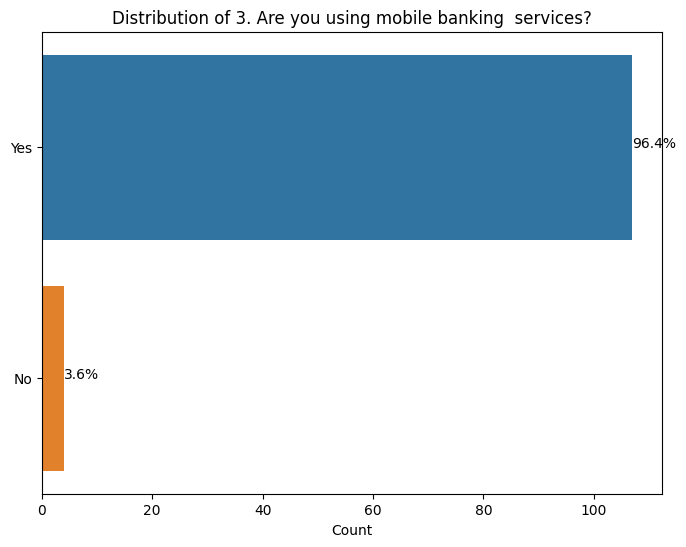

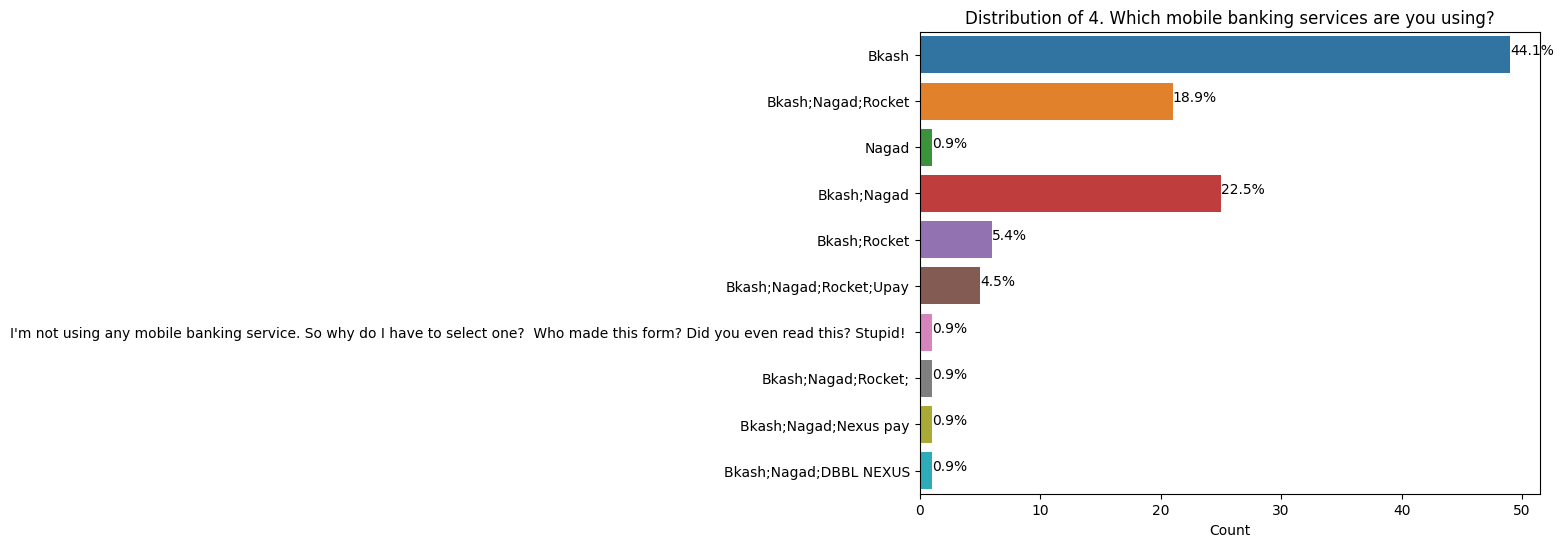

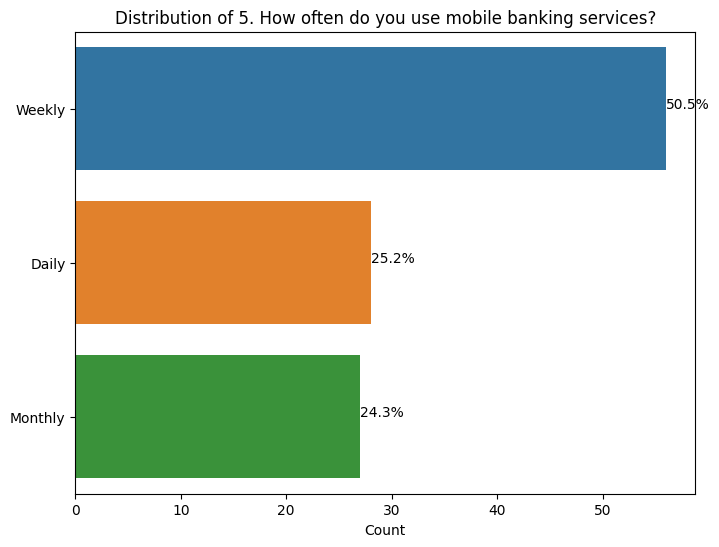

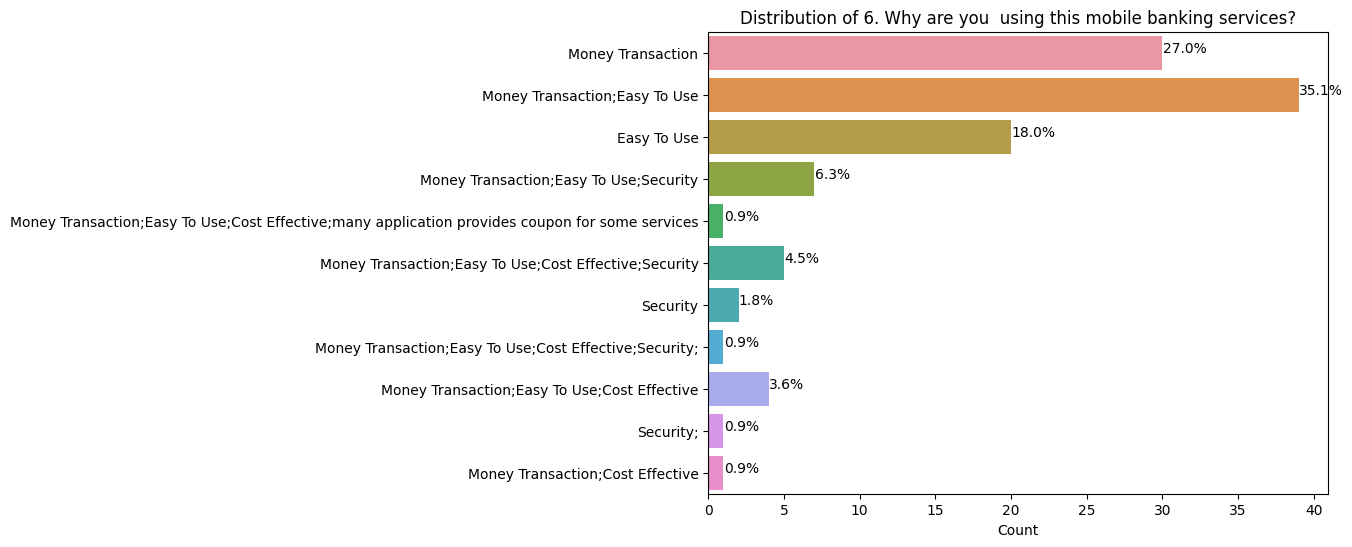

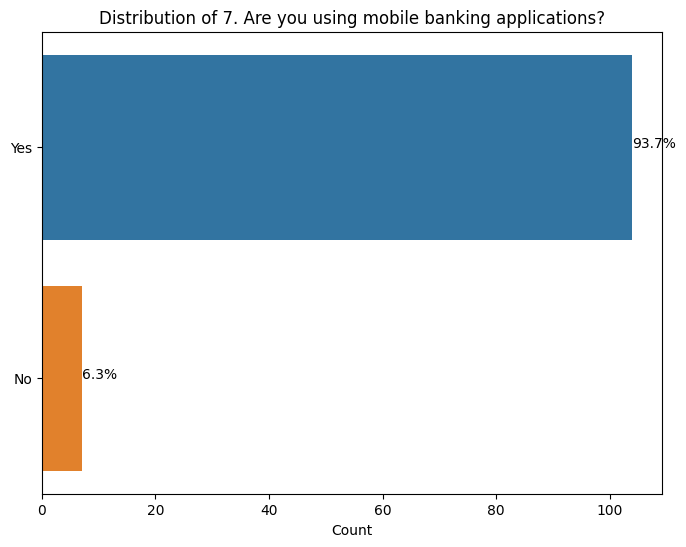

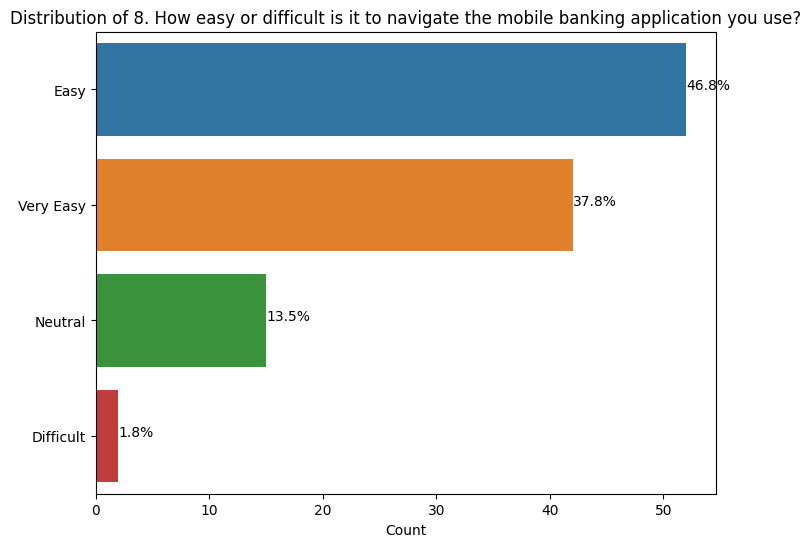

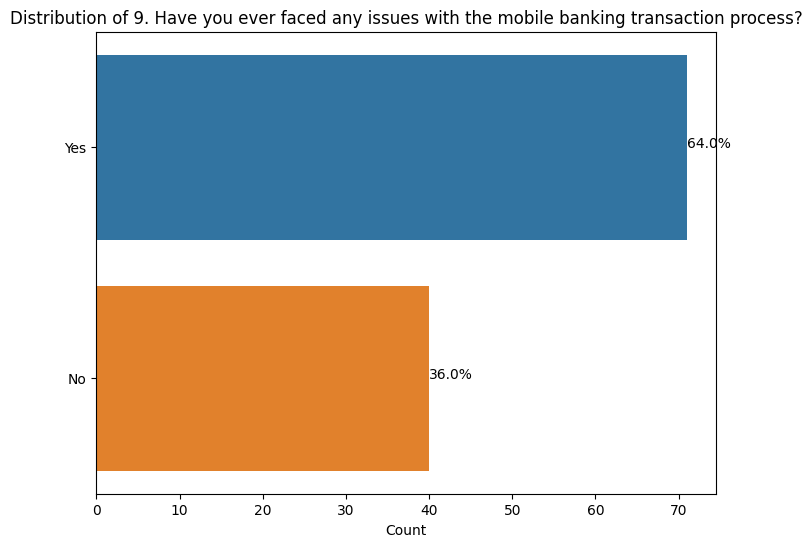

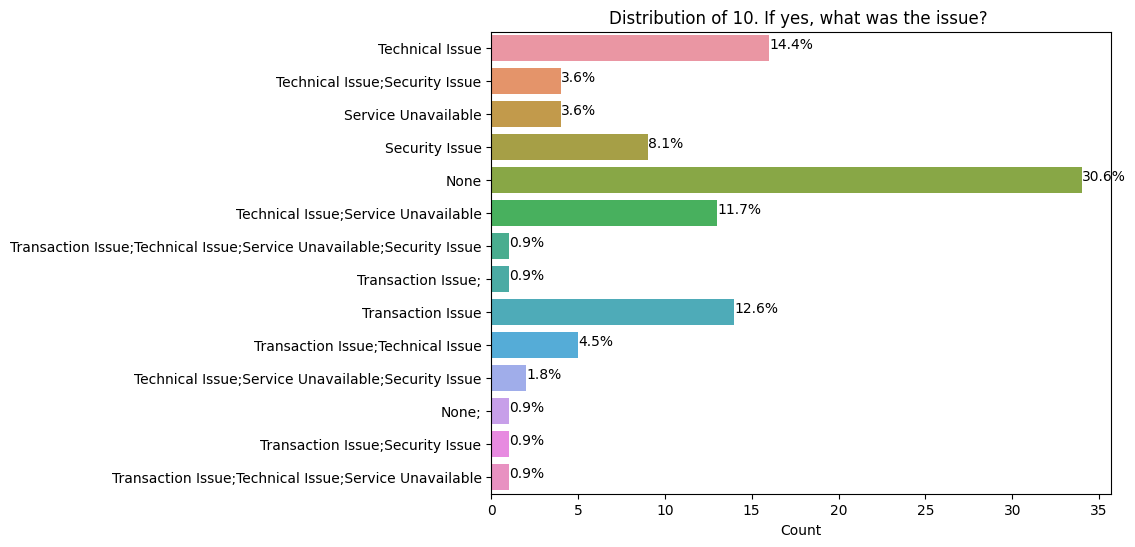

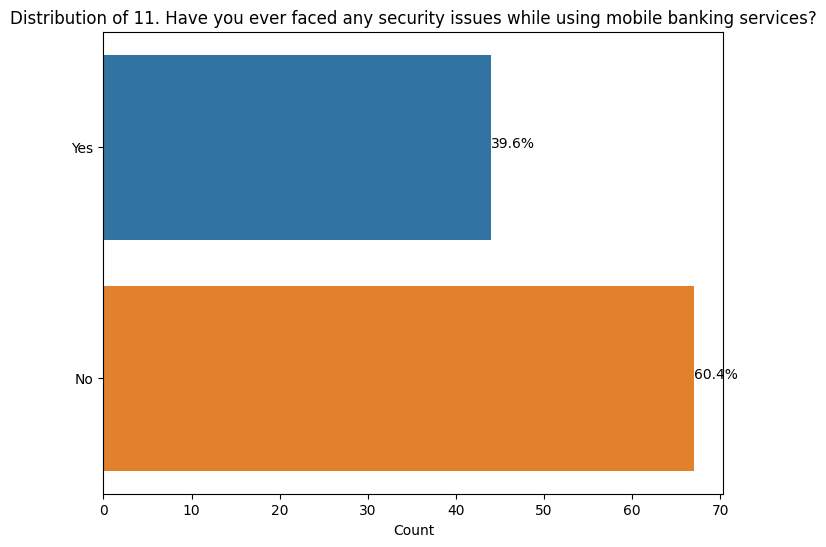

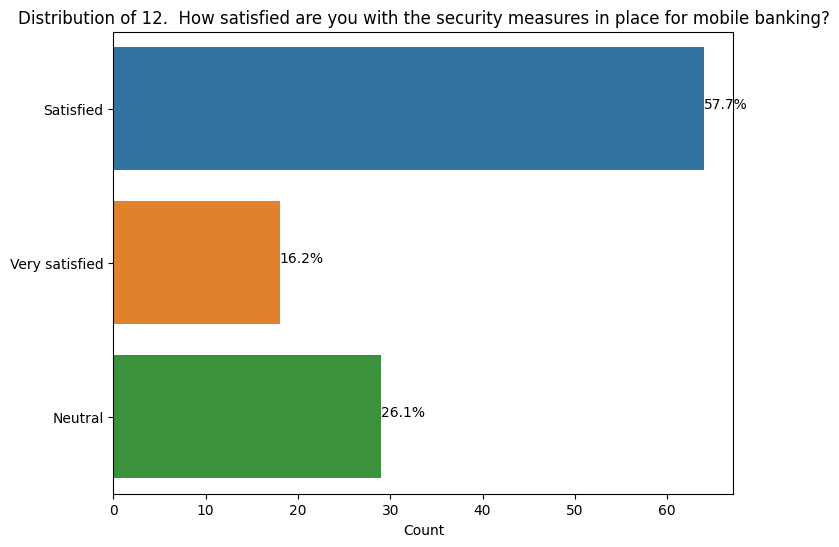

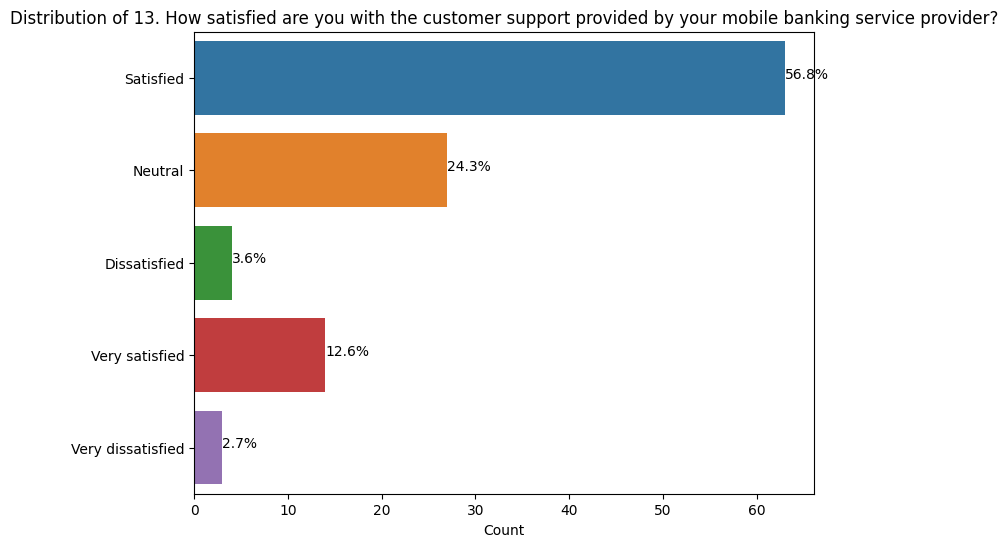

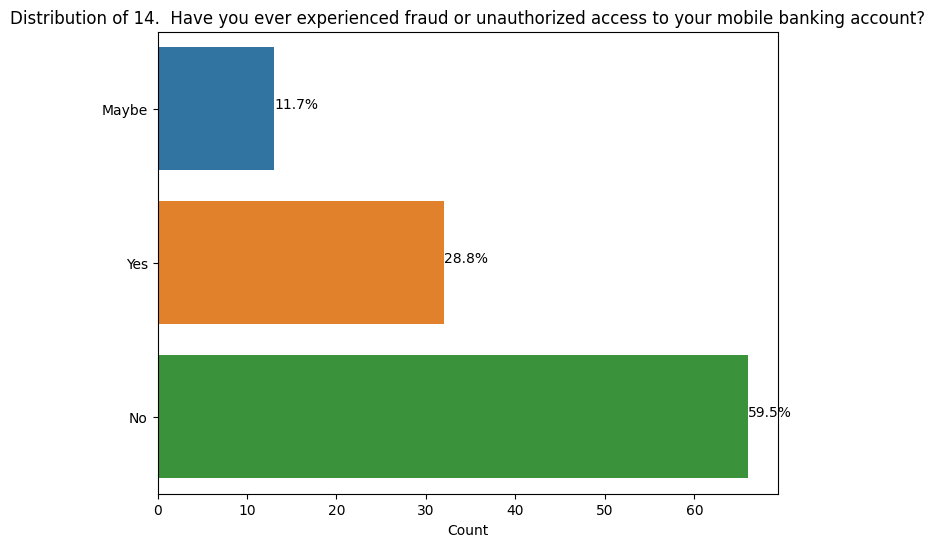

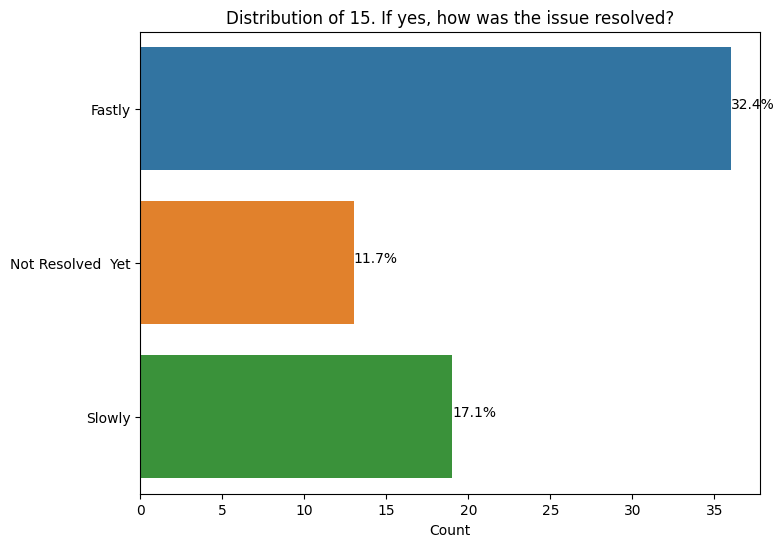

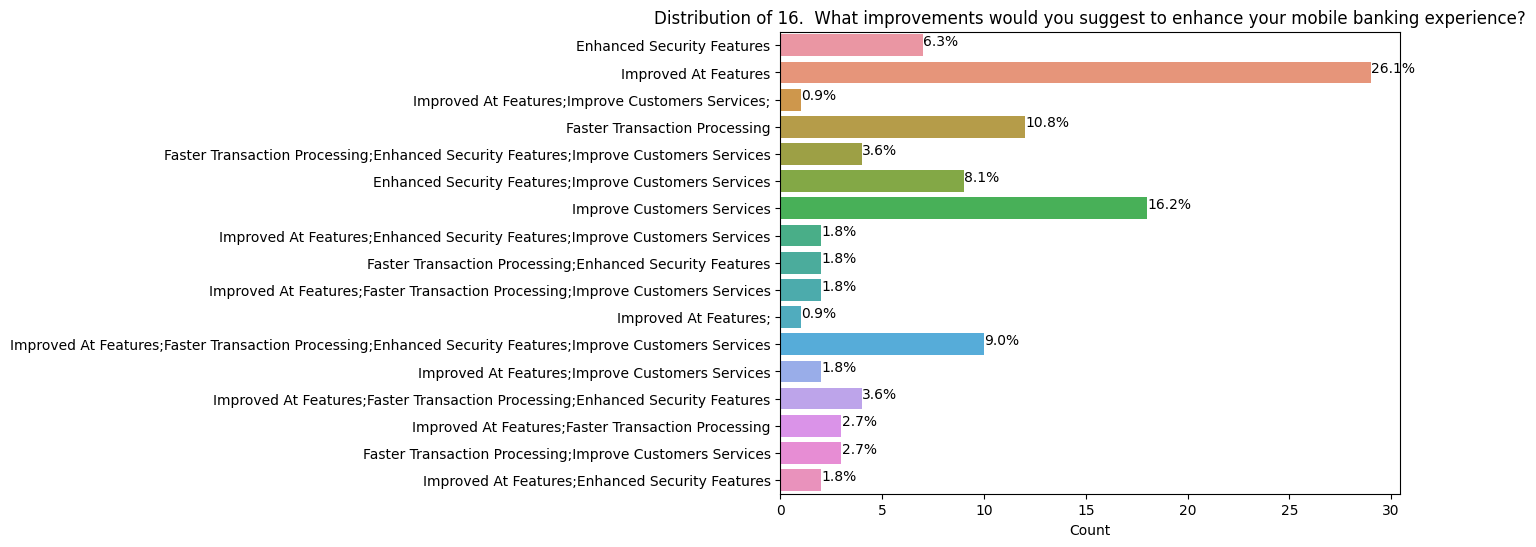

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Iterate over each column (excluding Timestamp)
for column in data.columns[1:]:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(y=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel("")

    # Add percentage text on each bar
    total = len(data[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

In [2]:
!git clone https://github.com/SMITamim/OnlineBankingUsersatiSfaction.git



Cloning into 'OnlineBankingUsersatiSfaction'...


In [5]:
git add .


SyntaxError: ignored